In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [9]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [11]:
cars=pd.DataFrame(cars,columns=["HP","VOL","SP","WT","HPG"])
cars.head()

,HP,VOL,SP,WT,HPG
0,49,89,104.185353,28.762059,NaN
1,55,92,105.461264,30.466833,NaN
2,55,92,105.461264,30.193597,NaN
3,70,92,113.461264,30.632114,NaN
4,53,92,104.461264,29.889149,NaN


Assumptions in multilinear Regression
 1.Linearity:the relationship between the predictors(X) and the response (Y) is linear
 2.Independence:Observaations are indepent of each other.
 3.NormalmDistrubution of errors:the residuals of the model.

EDA

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   HPG     0 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [21]:
cars.isna().sum()

HP      0
VOL     0
SP      0
WT      0
HPG    81
dtype: int64

Observations about info(), missing values
 - there are no missing values
 - Threre are 81 obsevations
 - the data types of the columns are aslo revelant and valid


In [ ]:
# Create a figure wwith two subplots
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
# Creating a bloxplot
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
#
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='density')

plt.tight_layout()
plt.show()


Observatons from boxplot and histograms
 - there are some  extreme values observed in towards the right tail os sp aand hp distribution
 - in VOL and WT columns,a few outlers are observed in both tails of the distruutions
 - 

Checking for duplicated rows


In [35]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,HPG


Pair plots and Correlation Coefficients

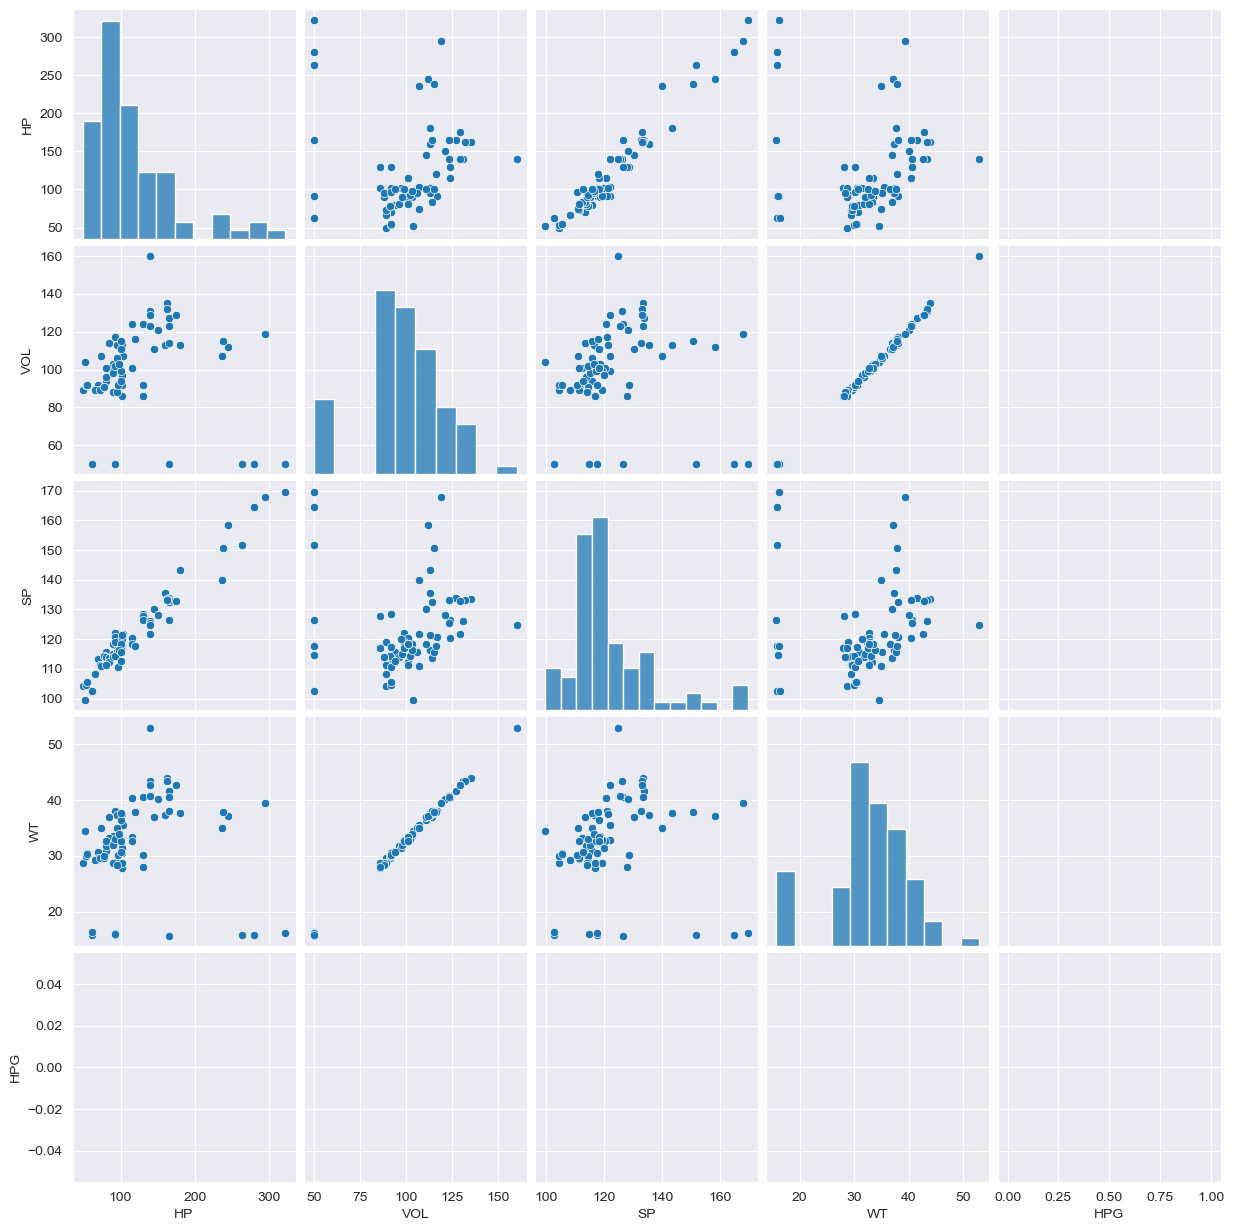

In [40]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)